In [1]:
import numpy as np
import pandas as pd
from importlib import reload
import matplotlib.pyplot as plt

In [2]:
import anchovy.md as md
import anchovy.plotting as aplt
import anchovy.analysis as als
import anchovy.maze_utils as mu

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'


In [3]:
import seaborn as sns
import matplotlib.colors as mclr

In [4]:
ss_sub = md.ssa_turn.loc[md.xp_new]
ft = als.fish_types(ss_sub)

Unstable: n = 5; Froze: n = 14


In [5]:
cm_n = 51
cm = plt.cm.get_cmap('RdBu_r', cm_n)
cmaplist = [cm(i) for i in range(cm.N)]
# force the first color entry to be grey
#cmaplist[int(cm_n/2)] = (1,1,1,1.0)
# create the new map
cm = cm.from_list('Custom cmap', cmaplist, cm.N)

In [6]:
def calc_occu(ss, win=36000):
    occu = np.zeros([ss.shape[0], 16])
    j = 0
    for i, s in ss.iterrows():
        co = pd.read_hdf('C:/Users/yashina/projects/fishy_vr/coords/test_{}.h5'.format(s.ss_id))
        s_next = md.ssa.loc[(md.ssa.xp_id == s.xp_id) & (md.ssa.ss_no == 2)].iloc[0]
        s_prev = md.ssa.loc[(md.ssa.xp_id == s.xp_id) & (md.ssa.ss_no == 0)].iloc[0]
        co_after = pd.read_hdf('C:/Users/yashina/projects/fishy_vr/coords/test_{}.h5'.format(s_next.ss_id))
        co_before = pd.read_hdf('C:/Users/yashina/projects/fishy_vr/coords/test_{}.h5'.format(s_prev.ss_id))

        co_end = co.iloc[-win:]
        co_end['rel'] = mu.relative(co_end.armfix, int(s.stim_at), arm_no=len(s.env_patterns))
        occu[j, 3] = (co_end.rel == 3).sum()
        arms = win-occu[j, 3]
        occu[j, 0] = (co_end.rel == 0).sum() - arms/3
        occu[j, 1] = (co_end.rel == 1).sum() - arms/3
        occu[j, 2] = (co_end.rel == 2).sum() - arms/3

        co_contr = co_before.iloc[-win:]
        co_contr['rel'] = mu.relative(co_contr.armfix, int(s.stim_at), arm_no=len(s.env_patterns))
        occu[j, 15] = (co_contr.rel == 3).sum()
        arms = win-occu[j, 15]
        occu[j, 12] = (co_contr.rel == 0).sum() - arms/3
        occu[j, 13] = (co_contr.rel == 1).sum() - arms/3
        occu[j, 14] = (co_contr.rel == 2).sum() - arms/3
        
        co_start = co_after.iloc[:win]
        co_start.loc[:, 'rel'] = mu.relative(co_start.armfix, int(s_next.stim_at), arm_no=len(s_next.env_patterns))
        co_start.loc[:, 'old'] = mu.relative(co_start.armfix, int(s.stim_at), arm_no=len(s.env_patterns))        
        occu[j, 7] = (co_start.old == 3).sum()
        arms = win-occu[j, 7]
        occu[j, 4] = (co_start.old == 0).sum() - arms/3
        occu[j, 5] = (co_start.old == 1).sum() - arms/3
        occu[j, 6] = (co_start.old == 2).sum() - arms/3

        
        occu[j, 11] = (co_start.rel == 3).sum()
        occu[j, 8] = (co_start.rel == 0).sum() - arms/3
        occu[j, 9] = (co_start.rel == 2).sum() - arms/3
        occu[j, 10] = (co_start.rel == 1).sum() - arms/3

        if occu[j, 1] < occu[j, 2]:
            occu[j, 1], occu[j, 2] = occu[j, 2], occu[j, 1]
            occu[j, 5], occu[j, 6] = occu[j, 6], occu[j, 5]
            occu[j, 9], occu[j, 10] = occu[j, 10], occu[j, 9]

        occu[j, :] /= win
        j += 1
    return occu

___

In [7]:
conflict = []
no_conflict = []
for g, gg in ss_sub.groupby('xp_id'):

    co_1 = pd.read_hdf('C:/Users/yashina/projects/fishy_vr/coords/test_{}.h5'.format(gg.iloc[1].ss_id))
    co_1 = co_1.iloc[18000:]
    all_arms = [0, 1, 2]
    all_arms.remove(gg.iloc[1].stim_at)
    co_1_0 = (co_1.armfix == all_arms[0]).sum()
    co_1_1 = (co_1.armfix == all_arms[1]).sum()
    if co_1_0 > co_1_1:
        pref_arm = all_arms[0]
    else:
        pref_arm = all_arms[1]
    if gg.iloc[2].stim_at == pref_arm:
        conflict.append(g)
    else:
        no_conflict.append(g)

print ('conflict loc vs pattern', len(conflict), conflict)
print ('no conflict loc vs pattern', len(no_conflict), no_conflict)

conflict loc vs pattern 57 ['011017-01-01', '011017-03-01', '011017-04-01', '011017-07-01', '081017-03-01', '081017-04-01', '081017-05-01', '081017-07-01', '081017-08-01', '120817-02-01', '120917-01-01', '120917-04-01', '120917-05-01', '130817-01-01', '130817-03-01', '130817-10-01', '150817-01-01', '150817-02-01', '150917-06-01', '160817-01-01', '160817-05-01', '160817-06-01', '160817-08-01', '160917-01-01', '160917-03-01', '160917-04-01', '180817-10-01', '200617-01-01', '200617-03-01', '200617-07-01', '220617-05-01', '220617-08-01', '230617-01-01', '230617-02-01', '230617-03-01', '240617-01-01', '240617-03-01', '240617-04-01', '240617-05-01', '240617-08-01', '250617-01-01', '250617-02-01', '250617-06-01', '250617-07-01', '250617-08-01', '270817-03-01', '270817-04-01', '270817-05-01', '270817-08-01', '290917-01-01', '290917-02-01', '290917-03-01', '290917-04-01', '290917-06-01', '290917-08-01', '300817-07-01', '300817-08-01']
no conflict loc vs pattern 64 ['011017-02-01', '011017-05-01

In [8]:
ss_conf = ss_sub.loc[ss_sub.xp_id.isin(conflict) & ss_sub.xp_id.isin(ft['One arm']+ft['Two arms']+ft['Non-responder']+
                                                                    ft['Center'])]

In [9]:
occu_turn_conf = calc_occu(ss_conf.loc[ss_conf.ss_no == 1], win=36000)

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\program files\python36\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

In [10]:
from scipy.cluster import hierarchy
Z = hierarchy.linkage(occu_turn_conf[:, :4], method='ward')
dn = hierarchy.dendrogram(Z, above_threshold_color='black',)

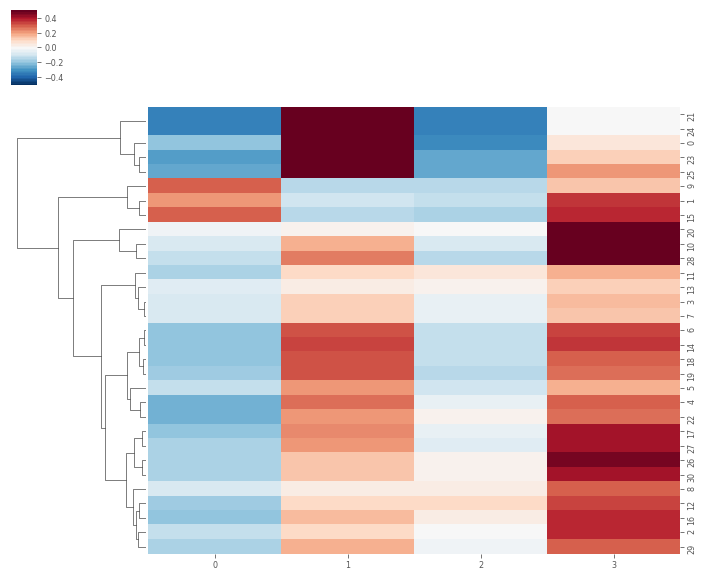

In [11]:
g_turn_conf = sns.clustermap(occu_turn_conf[:, :4], col_cluster=False, cmap=cm, vmax=0.5, vmin=-0.5, method='ward', figsize=(12, 10))

In [12]:
ids = ss_conf.loc[ss_conf.ss_no == 1].xp_id.values[g_turn_conf.dendrogram_row.reordered_ind]
ids[:5], ids[5:8], ids[8:11], ids[11:]

(array(['160917-03-01', '290917-06-01', '200617-03-01', '290917-01-01',
        '290917-08-01'], dtype=object),
 array(['250617-08-01', '230617-01-01', '270817-04-01'], dtype=object),
 array(['160917-01-01', '130817-10-01', '081017-05-01'], dtype=object),
 array(['150817-01-01', '160817-01-01', '220617-08-01', '250617-06-01',
        '240617-08-01', '160817-06-01', '300817-08-01', '150917-06-01',
        '240617-05-01', '240617-03-01', '160917-04-01', '300817-07-01',
        '081017-04-01', '081017-03-01', '081017-08-01', '250617-07-01',
        '150817-02-01', '270817-05-01', '230617-02-01', '081017-07-01'],
       dtype=object))

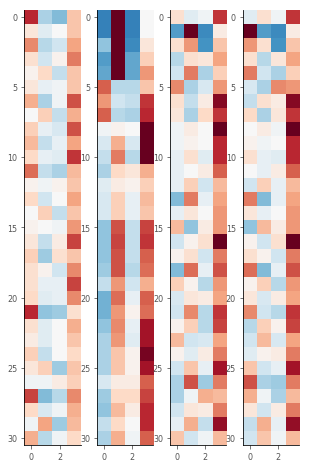

In [13]:
plt.figure(figsize=(5, 8))
plt.subplot('141')
plt.imshow(occu_turn_conf[g_turn_conf.dendrogram_row.reordered_ind, 12:16], cmap=cm, vmax=0.5, vmin=-0.5)
plt.subplot('142')
plt.imshow(occu_turn_conf[g_turn_conf.dendrogram_row.reordered_ind, :4], cmap=cm, vmax=0.5, vmin=-0.5)
plt.subplot('143')
plt.imshow(occu_turn_conf[g_turn_conf.dendrogram_row.reordered_ind, 4:8], cmap=cm, vmax=0.5, vmin=-0.5)
plt.subplot('144')
plt.imshow(occu_turn_conf[g_turn_conf.dendrogram_row.reordered_ind, 8:12], cmap=cm, vmax=0.5, vmin=-0.5)

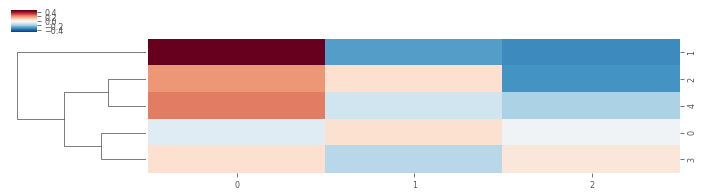

In [14]:
g_turn_conf_1 = sns.clustermap(occu_turn_conf[g_turn_conf.dendrogram_row.reordered_ind[:5], 8:11], col_cluster=False, cmap=cm,
                          vmax=0.5, vmin=-0.5, method='ward', figsize=(12, 3))

In [15]:
g_turn_conf_2 = sns.clustermap(occu_turn_conf[g_turn_conf.dendrogram_row.reordered_ind[5:8], 8:11], col_cluster=False, cmap=cm,
                          vmax=0.5, vmin=-0.5, method='ward', figsize=(12, 2))

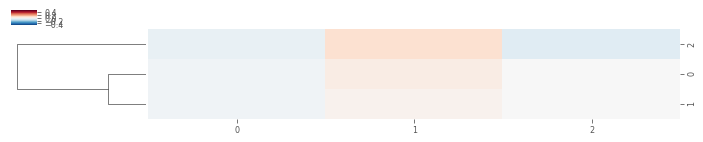

In [16]:
g_turn_conf_3 = sns.clustermap(occu_turn_conf[g_turn_conf.dendrogram_row.reordered_ind[8:11], 4:7], col_cluster=False, cmap=cm,
                          vmax=0.5, vmin=-0.5, method='ward', figsize=(12, 2))

In [17]:
g_turn_conf_4 = sns.clustermap(occu_turn_conf[g_turn_conf.dendrogram_row.reordered_ind[11:], 8:11], col_cluster=False, cmap=cm,
                          vmax=0.5, vmin=-0.5, method='ward', figsize=(12, 10))

In [25]:
import matplotlib.gridspec as gridspec

In [23]:
plt.figure(figsize=(8, 10))
conf_ordered = \
           occu_turn_conf[np.hstack([np.array(g_turn_conf.dendrogram_row.reordered_ind[:5])[g_turn_conf_1.dendrogram_row.reordered_ind],
           np.array(g_turn_conf.dendrogram_row.reordered_ind[5:8])[g_turn_conf_2.dendrogram_row.reordered_ind], 
           np.array(g_turn_conf.dendrogram_row.reordered_ind[8:11])[g_turn_conf_3.dendrogram_row.reordered_ind],
           np.array(g_turn_conf.dendrogram_row.reordered_ind[11:])[g_turn_conf_4.dendrogram_row.reordered_ind]])]
    
gs = gridspec.GridSpec(8, 6, width_ratios=[3, 1, 3, 1, 3, 1], height_ratios=[3, 1, 3, 1, 5, 1, 20, 1]) 

i = 0
vma, vmi = 0.4, -0.4
for r in [np.s_[8:11], np.s_[5:8], np.s_[0:5], np.s_[11:31]]:
    j = 0
    for l in [np.s_[12:15], np.s_[0:3], np.s_[8:11]]:
        plt.subplot(gs[0+2*j+12*i])
        plt.imshow(conf_ordered[r, l], cmap='RdBu_r', 
                  norm=mclr.SymLogNorm(linthresh=0.05, linscale=0.05, vmin=-1, vmax=1))
        plt.subplot(gs[1+2*j+12*i])
        plt.imshow(conf_ordered[r, l.stop:l.stop+1], cmap='RdGy', vmax=1, vmin=-1)
        plt.axis('off')
        plt.subplot(gs[6+2*j+12*i])
        plt.imshow([conf_ordered[[r, l]].mean(0)], cmap='RdBu_r', 
                  norm=mclr.SymLogNorm(linthresh=0.05, linscale=0.05, vmin=-1, vmax=1))
        plt.axis('off')
        plt.subplot(gs[7+2*j+12*i])
        plt.imshow([[conf_ordered[r, l.stop:l.stop+1].mean()]], cmap='RdGy', vmax=1, vmin=-1)
        plt.axis('off')
        j += 1
    i += 1

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


In [24]:
conf_ordered[np.r_[5:8, 11:15], :]

array([[ 0.21162037, -0.10276852, -0.10885185,  0.35427778,  0.0759537 ,
        -0.11771296,  0.04175926,  0.46011111, -0.11771296,  0.0759537 ,
         0.04175926,  0.46011111,  0.1805463 , -0.15923148, -0.02131481,
         0.31980556],
       [ 0.28439815, -0.1417963 , -0.14260185,  0.14686111,  0.24      ,
        -0.16038889, -0.07961111,  0.21575   , -0.07961111, -0.16038889,
         0.24      ,  0.21575   ,  0.05156481, -0.03896296, -0.01260185,
         0.12761111],
       [ 0.28487037, -0.12999074, -0.15487963,  0.37969444,  0.06312037,
        -0.16324074,  0.10012037,  0.34702778,  0.10012037, -0.16324074,
         0.06312037,  0.34702778,  0.00266667,  0.12061111, -0.12327778,
         0.18183333],
       [-0.1589537 ,  0.13376852,  0.02518519,  0.41913889, -0.1012963 ,
         0.14356481, -0.04226852,  0.40536111,  0.14356481, -0.1012963 ,
        -0.04226852,  0.40536111,  0.05626852,  0.11160185, -0.16787037,
         0.14555556],
       [-0.23316667,  0.20833333,  0

In [26]:
plt.figure(figsize=(6, 11))
gs = gridspec.GridSpec(4, 2, width_ratios=[3, 1], height_ratios=[3, 3, 20, 5]) 
plt.subplot(gs[0])
plt.imshow(conf_ordered[8:11, :3], aspect='auto', cmap='RdBu_r', 
                   norm=mclr.SymLogNorm(linthresh=0.05, linscale=0.05, vmin=-1, vmax=1))
plt.axis('off')
plt.subplot(gs[1])
plt.imshow(conf_ordered[8:11, 3:4], aspect='auto', cmap='RdGy', vmin=-0.8, vmax=0.8)
plt.axis('off')
plt.subplot(gs[2])
plt.imshow(conf_ordered[5:8, :3], aspect='auto', cmap='RdBu_r', 
                   norm=mclr.SymLogNorm(linthresh=0.05, linscale=0.05, vmin=-1, vmax=1))
plt.axis('off')
plt.subplot(gs[3])
plt.imshow(conf_ordered[5:8, 3:4], aspect='auto', cmap='RdGy', vmin=-0.8, vmax=0.8)
plt.axis('off')
plt.subplot(gs[4])
plt.imshow(conf_ordered[11:, :3], aspect='auto', cmap='RdBu_r', 
                   norm=mclr.SymLogNorm(linthresh=0.05, linscale=0.05, vmin=-1, vmax=1))
plt.axis('off')
plt.subplot(gs[5])
plt.imshow(conf_ordered[11:, 3:4], aspect='auto', cmap='RdGy', vmin=-0.8, vmax=0.8)
plt.axis('off')
plt.subplot(gs[6])
plt.imshow(conf_ordered[:5, :3], aspect='auto', cmap='RdBu_r', 
                   norm=mclr.SymLogNorm(linthresh=0.05, linscale=0.05, vmin=-1, vmax=1))
plt.axis('off')
plt.subplot(gs[7])
plt.imshow(conf_ordered[:5, 3:4], aspect='auto', cmap='RdGy', vmin=-0.8, vmax=0.8)
plt.axis('off')

(-0.5, 0.5, 4.5, -0.5)

In [27]:
ss_noconf = ss_sub.loc[ss_sub.xp_id.isin(no_conflict) & ss_sub.xp_id.isin(ft['One arm']+ft['Two arms']+ft['Non-responder']+
                                                                    ft['Center'])]

In [28]:
occu_turn_noconf = calc_occu(ss_noconf.loc[ss_noconf.ss_no == 1], win=36000)

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\program files\python36\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

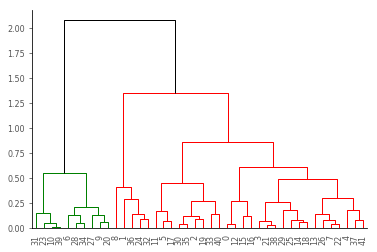

In [29]:
from scipy.cluster import hierarchy
Z = hierarchy.linkage(occu_turn_noconf[:, :4], method='ward')
dn = hierarchy.dendrogram(Z, above_threshold_color='black',)

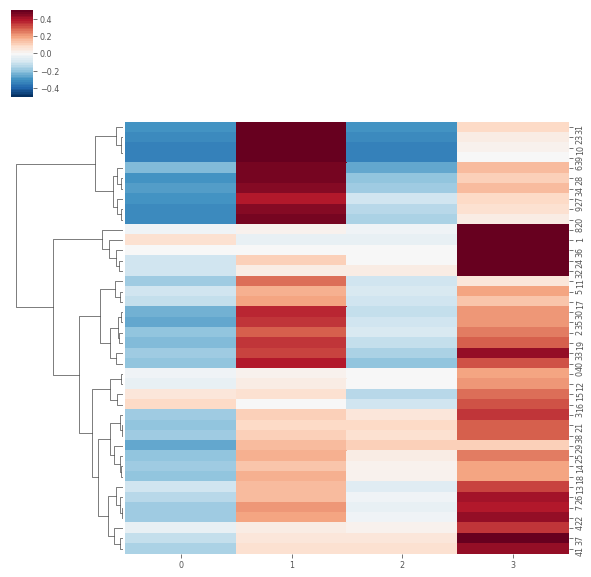

In [30]:
g_turn_noconf = sns.clustermap(occu_turn_noconf[:, :4], col_cluster=False, cmap=cm, vmax=0.5, vmin=-0.5,
                               method='ward', figsize=(10, 10))

In [31]:
ids = ss_noconf.loc[ss_noconf.ss_no == 1].xp_id.values[g_turn_noconf.dendrogram_row.reordered_ind]
ids[:10], ids[10:15], ids[24:28], [ids[15:24], ids[28:]]

(array(['120917-06-01', '300817-02-01', '130817-05-01', '290917-07-01',
        '240617-02-01', '310817-02-01', '150917-03-01', '310817-01-01',
        '120817-01-01', '180817-11-01'], dtype=object),
 array(['250617-04-01', '200617-08-01', '160917-02-01', '300817-04-01',
        '150917-01-01'], dtype=object),
 array(['200617-06-01', '130817-07-01', '160817-02-01', '160817-03-01'],
       dtype=object),
 [array(['130817-06-01', '220617-06-01', '160817-04-01', '120917-03-01',
         '150917-05-01', '200617-10-01', '180817-09-01', '150917-02-01',
         '011017-05-01'], dtype=object),
  array(['210617-01-01', '270817-07-01', '290917-05-01', '120917-02-01',
         '300817-05-01', '140817-04-01', '160817-07-01', '130817-08-01',
         '300817-06-01', '250617-03-01', '300817-01-01', '230617-04-01',
         '160917-05-01', '081017-01-01'], dtype=object)])

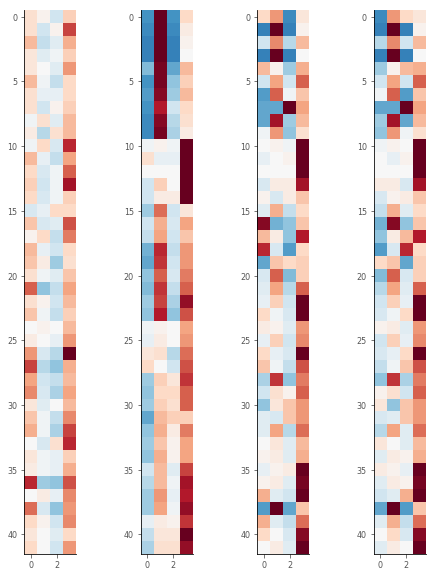

In [32]:
plt.figure(figsize=(8, 10))
plt.subplot('141')
plt.imshow(occu_turn_noconf[g_turn_noconf.dendrogram_row.reordered_ind, 12:16], cmap=cm, vmax=0.5, vmin=-0.5)
plt.subplot('142')
plt.imshow(occu_turn_noconf[g_turn_noconf.dendrogram_row.reordered_ind, :4], cmap=cm, vmax=0.5, vmin=-0.5)
plt.subplot('143')
plt.imshow(occu_turn_noconf[g_turn_noconf.dendrogram_row.reordered_ind, 4:8], cmap=cm, vmax=0.5, vmin=-0.5)
plt.subplot('144')
plt.imshow(occu_turn_noconf[g_turn_noconf.dendrogram_row.reordered_ind, 8:12], cmap=cm, vmax=0.5, vmin=-0.5)

In [33]:
g_turn_noconf_1 = sns.clustermap(occu_turn_noconf[g_turn_noconf.dendrogram_row.reordered_ind[:10], 8:11], col_cluster=False, cmap=cm,
                          vmax=0.5, vmin=-0.5, method='ward', figsize=(12, 5))

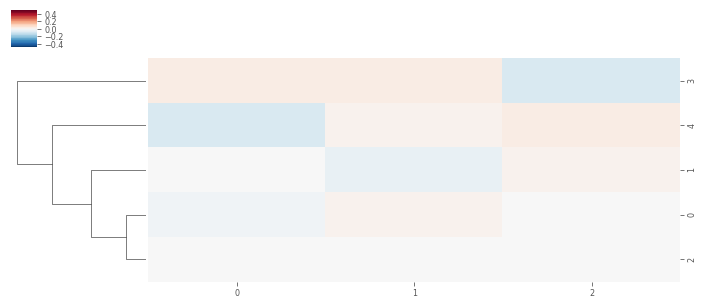

In [34]:
g_turn_noconf_2 = sns.clustermap(occu_turn_noconf[g_turn_noconf.dendrogram_row.reordered_ind[10:15], 8:11], col_cluster=False, cmap=cm,
                          vmax=0.5, vmin=-0.5, method='ward', figsize=(12, 5))

In [35]:
g_turn_noconf_3 = sns.clustermap(occu_turn_noconf[g_turn_noconf.dendrogram_row.reordered_ind[24:28], 8:11], col_cluster=False, cmap=cm,
                          vmax=0.5, vmin=-0.5, method='ward', figsize=(12, 5))

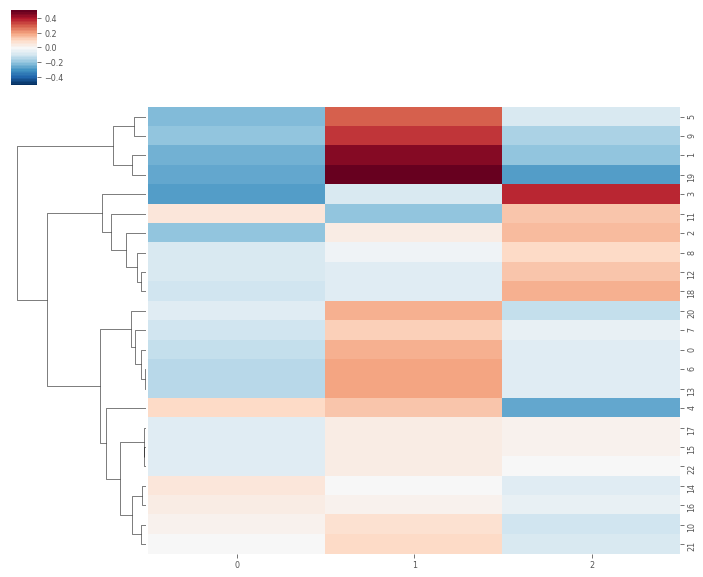

In [36]:
g_turn_noconf_4 = sns.clustermap(occu_turn_noconf[np.array(g_turn_noconf.dendrogram_row.reordered_ind)[np.r_[15:24, 28:42]], 8:11], col_cluster=False, cmap=cm,
                          vmax=0.5, vmin=-0.5, method='ward', figsize=(12, 10))

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


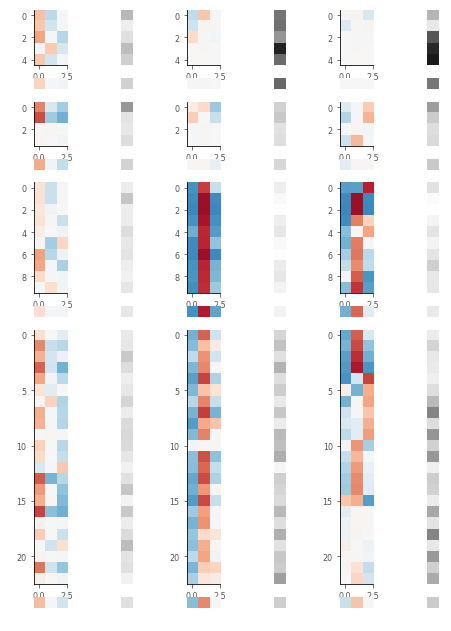

In [38]:
plt.figure(figsize=(8, 11))
noconf_ordered = occu_turn_noconf[np.hstack([np.array(g_turn_noconf.dendrogram_row.reordered_ind[:10])[g_turn_noconf_1.dendrogram_row.reordered_ind],
           np.array(g_turn_noconf.dendrogram_row.reordered_ind[10:15])[g_turn_noconf_2.dendrogram_row.reordered_ind], 
           np.array(g_turn_noconf.dendrogram_row.reordered_ind[24:28])[g_turn_noconf_3.dendrogram_row.reordered_ind],
           np.array(np.array(g_turn_noconf.dendrogram_row.reordered_ind)[np.r_[15:24, 28:42]])[g_turn_noconf_4.dendrogram_row.reordered_ind]])]

gs = gridspec.GridSpec(8, 6, width_ratios=[3, 1, 3, 1, 3, 1], height_ratios=[5, 1, 4, 1, 10, 1, 23, 1]) 

i = 0
vma, vmi = 0.4, -0.4
for r in [np.s_[10:15], np.s_[15:19], np.s_[0:10], np.s_[19:42]]:
    j = 0
    for l in [np.s_[12:15], np.s_[0:3], np.s_[8:11]]:
        plt.subplot(gs[0+2*j+12*i])
        plt.imshow(noconf_ordered[r, l], cmap='RdBu_r', 
                  norm=mclr.SymLogNorm(linthresh=0.05, linscale=0.05, vmin=-1, vmax=1))
        plt.subplot(gs[1+2*j+12*i])
        plt.imshow(noconf_ordered[r, l.stop:l.stop+1], cmap='RdGy', vmax=1, vmin=-1)
        plt.axis('off')
        plt.subplot(gs[6+2*j+12*i])
        plt.imshow([noconf_ordered[[r, l]].mean(0)], cmap='RdBu_r', 
                  norm=mclr.SymLogNorm(linthresh=0.05, linscale=0.05, vmin=-1, vmax=1))
        plt.axis('off')
        plt.subplot(gs[7+2*j+12*i])
        plt.imshow([[noconf_ordered[r, l.stop:l.stop+1].mean()]], cmap='RdGy', vmax=1, vmin=-1)
        plt.axis('off')
        j += 1
    i += 1

(-0.5, 0.5, 9.5, -0.5)

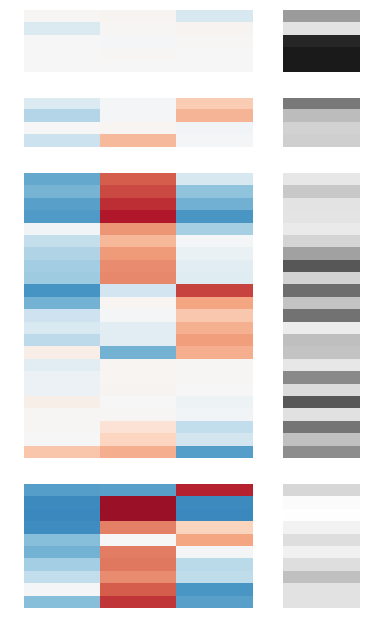

In [39]:
plt.figure(figsize=(6, 11))
gs = gridspec.GridSpec(4, 2, width_ratios=[3, 1], height_ratios=[5, 4, 23, 10]) 
plt.subplot(gs[0])
plt.imshow(noconf_ordered[10:15, 8:11], aspect='auto', cmap='RdBu_r', 
                   norm=mclr.SymLogNorm(linthresh=0.05, linscale=0.05, vmin=-1, vmax=1))
plt.axis('off')
plt.subplot(gs[1])
plt.imshow(noconf_ordered[10:15, 11:12], aspect='auto', cmap='RdGy', vmin=-0.8, vmax=0.8)
plt.axis('off')
plt.subplot(gs[2])
plt.imshow(noconf_ordered[15:19, 8:11], aspect='auto', cmap='RdBu_r', 
                   norm=mclr.SymLogNorm(linthresh=0.05, linscale=0.05, vmin=-1, vmax=1))
plt.axis('off')
plt.subplot(gs[3])
plt.imshow(noconf_ordered[15:19, 11:12], aspect='auto', cmap='RdGy', vmin=-0.8, vmax=0.8)
plt.axis('off')
plt.subplot(gs[4])
plt.imshow(noconf_ordered[19:, 8:11][np.r_[0:4, 10:15, 4:5, 6:10, 5:6, 16:23, 15:16]], aspect='auto', cmap='RdBu_r', 
                   norm=mclr.SymLogNorm(linthresh=0.05, linscale=0.05, vmin=-1, vmax=1))
plt.axis('off')
plt.subplot(gs[5])
plt.imshow(noconf_ordered[19:, 11:12], aspect='auto', cmap='RdGy', vmin=-0.8, vmax=0.8)
plt.axis('off')
plt.subplot(gs[6])
plt.imshow(noconf_ordered[:10, 8:11], aspect='auto', cmap='RdBu_r', 
                   norm=mclr.SymLogNorm(linthresh=0.05, linscale=0.05, vmin=-1, vmax=1))
plt.axis('off')
plt.subplot(gs[7])
plt.imshow(noconf_ordered[:10, 11:12], aspect='auto', cmap='RdGy', vmin=-0.8, vmax=0.8)
plt.axis('off')